# Customer Clustering Issues Analysis

So a wide array of businesses offer customer support dealing with problems that their customers face on a daily basis. 

Now generally speaking, there is not a lot that can be done to remove every problem from a product, and by that I mean you cannot make or sell a product without there being problems in it which might be encountered later on by the consumers. In such a case, a well responsive customer support is needed.

But the problem with that would be, you cannot teach every problem that a product may encounter in it's lifetime to every executive in the customer support department and expect him to remember it.

The solution ? Well make specific people deal with specific problems. Much like how there are different departments in an office (Software,HR,Finance etc.).

Now this may appear as a solution, but the problems that a product can encounter, well they may be more than what individuals can learn or the number of individuals will come out to be too large for the organisation to train if each problem and how to deal with it was taught to each individual seperately.

So in this notebook, I work upon how to perform clustering on such problems to deploy new departments to help resolve them as soon as possible. Now if you feel how about just assigning different generalised department related to product and the problems it may encounter to the staff like hardware problems, software problems etc. But if the product is quite small, having generalised departments will be diffcult to make and if the product is a big one in the sense that their are billions of users facing issues, just having a software department for problem solving is not enough, you will need more specific clusters which may not have a designated name since clustering sometimes doesn't need to have a well defined label on it, but number of personnel to train on that specific group can be decided and worked upon.

Example:

If a telecom provider offers customer care service to deal with problems faced by users, problems are going to be so large in number that having a generalised topic of the problem may lead to 100+ topics. Having a department each for such topics is not cost effective or even plausible for an organisation. So how about clusters of related problems ? People in a single cluster will know how to deal with similar problems because clusters in such a situation will be helpful. This is the intent of this entire notebook. So let's get started !

Dataset : https://www.kaggle.com/MLcssoncamp/customer-issues#customer-issues.zip

In [44]:
import pandas as pd

In [45]:
issues = pd.read_csv('/Users/rishabh/Desktop/Kaggle/Customer/customer-issues.csv')

In [46]:
issues.head()

,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634


## Some analysis first

In [47]:
issues['issue'].value_counts()

Incorrect information on credit report                                              21220
Cont'd attempts collect debt not owed                                               17447
Loan servicing, payments, escrow account                                            14727
Loan modification,collection,foreclosure                                            10791
Dealing with my lender or servicer                                                   7910
Disclosure verification of debt                                                      7595
Incorrect information on your report                                                 7373
Communication tactics                                                                6651
Account opening, closing, or management                                              6348
Credit reporting company's investigation                                             5663
Managing the loan or lease                                                           4853
False stat

As you can see the number of topics issues is quite a lot to assign each a new department to deal with.

## Checking for nulls

Before checking for nulls, I would like to describe as what approach I will be taking in cluster generation. So what I am planning to do is generate a sparse matrix of tfidf extracted keywords from the complaint messages of users. Along with this, one hot encode the state as well. Both of these will be used as a numpy array to form clusters. I could have also used one hot encoding of the product, but the message matrix to generate and then to perform clustering takes a hell lot of time, you can however carry it forward to one hot encoding th product as well. I won't be using columns like timely response and resolution since these will provide me information about my clusters when they are formed.

In [48]:
issues['consumer-message'].isnull().any()

False

So we don't have any null values in consumer message for the data present

In [49]:
issues['state'].isnull().sum()

563

We can remove that row since it is quite less compared to our data

In [50]:
issues2 = issues.dropna(axis=0,subset=['state'])

In [51]:
issues2.shape[0],issues.shape[0]

(199407, 199970)

In [52]:
len(issues2['state'].value_counts())

62

### One hot encoding state column for clustering

In [53]:
df = pd.get_dummies(issues2,columns=['state'])

In [54]:
df.head()

,date-received,product,sub-product,issue,sub-issue,consumer-message,zip-code,tags,via,resolution,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,352XX,NaN,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,177XX,Older American,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,224XX,NaN,Web,Closed with explanation,...,0,0,0,1,0,0,0,0,0,0
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,752XX,NaN,Web,Closed with explanation,...,0,1,0,0,0,0,0,0,0,0
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,693XX,NaN,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0


#### Now I am just going to clean up the complaint messages for forming tfIdf vectorizer

In [55]:
def clean_text(x):
    s = ''
    for i in x:
        if i.isalpha():
            s=s+i.lower()
        else:
            s=s+' '
    return s
df['consumer-message']=df['consumer-message'].apply(clean_text)

In [56]:
df.head()

,date-received,product,sub-product,issue,sub-issue,consumer-message,zip-code,tags,via,resolution,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,i have outdated information on my credit repor...,352XX,NaN,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,i purchased a new car on xxxx xxxx the car de...,177XX,Older American,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,an account on my credit report has a mistaken ...,224XX,NaN,Web,Closed with explanation,...,0,0,0,1,0,0,0,0,0,0
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,this company refuses to provide me verificatio...,752XX,NaN,Web,Closed with explanation,...,0,1,0,0,0,0,0,0,0,0
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,this complaint is in regards to square two fin...,693XX,NaN,Web,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
li = set()
c=0
for i in df['consumer-message']:
    for j in i.split(' '):
        if j not in li:
            li.add(j)

In [59]:
len(li)

82359

This is the size of total vocabulary of our customer complaint messages

Remember, I can choose max features to something more reasonable like 5000 since our vocabulary size is quite big itself, but training cluster on such a big size will be a very intensive task, which however will generate better results. I am just going to leave it to 1000 as of now, but chaning it to even more, will give you clusters that are more far and accurate.

In [60]:
v = TfidfVectorizer(max_features=1000)

In [61]:
x = v.fit_transform(df['consumer-message'])

In [62]:
x.shape

(199407, 1000)

In [106]:
print(x[1,403])

0.015424871929685783


In [63]:
for i, col in enumerate(v.get_feature_names()):
    df[col] = pd.SparseSeries(x[:, i].toarray().ravel(), fill_value=0)

In [64]:
df.head(2)

,date-received,product,sub-product,issue,sub-issue,consumer-message,zip-code,tags,via,resolution,...,written,wrong,wrote,xx,xxxx,year,years,yet,you,your
0,10/1/2016,Credit reporting,NaN,0.0,Account status,i have outdated information on my credit repor...,352XX,NaN,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.191773,0.245868,0.0,0.0
1,10/17/2016,Consumer Loan,Vehicle loan,0.0,NaN,i purchased a new car on xxxx xxxx the car de...,177XX,Older American,0.0,0.0,...,0.0,0.0,0.0,0.058941,0.34046,0.037556,0.000000,0.000000,0.0,0.0


In [88]:
df.fillna(0)

,date-received,product,sub-product,issue,sub-issue,consumer-message,zip-code,tags,via,resolution,...,written,wrong,wrote,xx,xxxx,year,years,yet,you,your
0,10/1/2016,Credit reporting,0,0.000000,Account status,i have outdated information on my credit repor...,352XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.191773,0.245868,0.000000,0.000000
1,10/17/2016,Consumer Loan,Vehicle loan,0.000000,0,i purchased a new car on xxxx xxxx the car de...,177XX,Older American,0.000000,0.0,...,0.000000,0.0,0.000000,0.058941,0.340460,0.037556,0.000000,0.000000,0.000000,0.000000
2,6/15/2015,Credit reporting,0,0.000000,Inadequate help over the phone,an account on my credit report has a mistaken ...,224XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.021488,0.000000,0.000000,0.065166,0.000000,0.000000
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",0.000000,Not given enough info to verify debt,this company refuses to provide me verificatio...,752XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2/17/2016,Debt collection,Credit card,0.000000,Talked to a third party about my debt,this complaint is in regards to square two fin...,693XX,0,0.044831,0.0,...,0.047832,0.0,0.000000,0.000000,0.577218,0.038825,0.000000,0.000000,0.000000,0.000000
5,11/18/2016,Mortgage,Conventional fixed mortgage,0.000000,0,started the refinance of home mortgage process...,088XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.120330,0.027802,0.000000,0.000000,0.000000,0.000000,0.000000
6,7/16/2015,Mortgage,Conventional fixed mortgage,0.000000,0,in xxxx i and my ex husband applied for a ref...,625XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.230484,0.000000,0.072692,0.046598,0.000000,0.000000
7,8/9/2016,Credit reporting,0,0.000000,Problem with statement of dispute,i have disputed several accounts on my credit ...,390XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.178445,0.000000,0.000000,0.000000,0.000000,0.000000
8,4/27/2016,Mortgage,Conventional fixed mortgage,0.041503,0,mortgage was transferred to nationstar as of x...,954XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.374016,0.000000,0.000000,0.000000,0.000000,0.000000
9,2/28/2017,Credit card,0,0.000000,0,was a happy xxxx card member for years in lat...,027XX,0,0.000000,0.0,...,0.000000,0.0,0.000000,0.214598,0.123958,0.000000,0.117285,0.000000,0.054499,0.000000


In [89]:
clusterdata = df.iloc[:,-1058:].values

In [85]:
clusterdata.shape

(199407, 1058)

In [82]:
df.columns

Index(['date-received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer-message', 'zip-code', 'tags', 'via', 'resolution',
       ...
       'written', 'wrong', 'wrote', 'xx', 'xxxx', 'year', 'years', 'yet',
       'you', 'your'],
      dtype='object', length=1072)

In [83]:
df.shape

(199407, 1072)

In [108]:
clusterdata = np.nan_to_num(clusterdata)

In [77]:
from sklearn.cluster import KMeans

In [78]:
import matplotlib.pyplot as plt

In [79]:
import numpy as np

In [80]:
from numpy import *

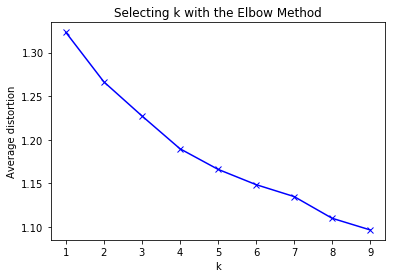

In [109]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    prediction=model.predict(clusterdata)
    meanDistortions.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1)) / clusterdata.shape[0])
 
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

The elbow is coming out at 5 clusters

In [110]:
final_model=KMeans(5)
final_model.fit(clusterdata)
prediction=final_model.predict(clusterdata)
issues2['Group']=prediction
issues2.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id,Group
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773,4
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100,4
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702,4
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196,1
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634,4


## Analysis of our clusters

In [111]:
import seaborn as sns

In [112]:
%matplotlib inline

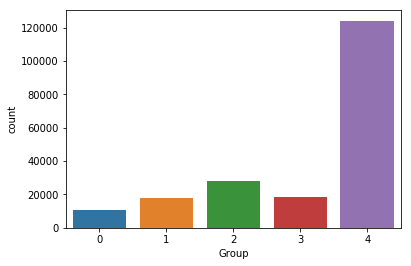

In [113]:
sns.countplot('Group',data=issues2)

Now the groups could have come a lot more different if I had more features in my vectorizer. But it gives an idea of what I have to work upon. 

So in short, problems of group 4 are a lot more as compared to problems of group 0,1,2,3. So allocating and training more people to deal with problem in group 4 is highly helpful.

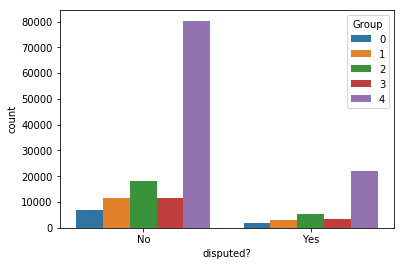

In [121]:
sns.countplot('disputed?',hue='Group',data=issues2)

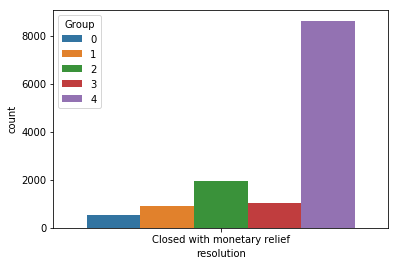

In [125]:
sns.countplot('resolution',hue='Group',data=issues2[issues2['resolution']=='Closed with monetary relief'])

So around 20000 cases in the service were disputed for category 4, which gives us all the more reasons to engage more trained professionals in solving problems of people dealing with this group.
And there are around a total of 10000 cases of group 2 and 4 related problems which are causing monetory relief to clients. This can also be seen as a loss in revenue !

So this was performing unsupervised learning to deal with customer analysis. As I mentioned above, more accurate clusters could have been formed if I had just used something like 5000 features, product details (one hot encoded) etc.